## Series 1: Data Analysis with the Titanic
This notebook uses Pandas to explore, clean, analyze, and visualize basic information about the Titanic dataset and includes findings related to survival based on age, gender, class, and a host of other characteristics.



# Section 1: Import Libraries

In [7]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Section 2: Exploring Data
In this section I use a number of different Pandas methods and attributes that allow me to gain a better understanding of what my data contains, how I need to clean it, and what sort of questions I may be able to ask from it. I have included the output for each line so you can see how each method and attribute performs. Many of these methods are realatively straightforward and if any single method appears to not make sense please check the Pandas documenation at http://pandas.pydata.org/pandas-docs/stable/ or use stackoverflow.com for more info. 

In [8]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
titanic.shape

(891, 12)

In [11]:
titanic['Fare'].max()

512.32920000000001

In [12]:
titanic['Fare'].min()

0.0

In [13]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
z = titanic.isnull().sum()
z

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

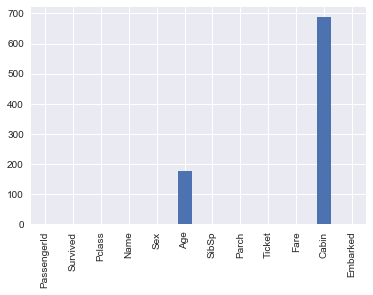

In [17]:
z.plot(kind = 'bar')

In [18]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [19]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


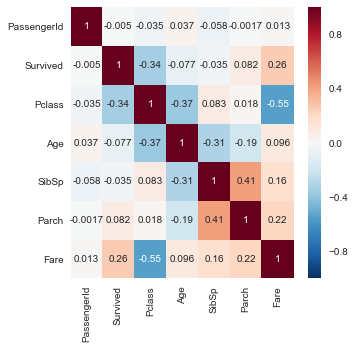

In [21]:
plt.figure(figsize= (5,5))
sns.heatmap(titanic.corr(), annot = True)

# Section 3: Cleaning Data

Having explored the data and found out some general chracteristics such as the shape, size, and null value count, I am now ready to clean the data so that I may analyze it. One of the major aspects of cleaning data is deciding what to do with null values. There is no single best practice when it comes to cleaning a dataset, but as a rule of thumb, try to preserve the original form of the dataset as best you can. More specifically, be careful with how you either drop or replace null values. In the below example, I did not drop the cabin row despite the number of null values associated with it. Instead, I assigned the string '¯\(ツ)/¯' to the null value and was able to use a pivot table with all associated values to find out the survival rate for unmarked cabins.  

In [22]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female':1})

In [24]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace = True)


In [25]:
titanic.dropna(subset = ['Embarked'],inplace = True)

In [26]:
titanic['Cabin'] = titanic['Cabin'].fillna(value = '¯\(ツ)/¯')


In [27]:
titanic['Family_Count'] = titanic['SibSp'] + titanic['Parch']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Count
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0


How many Reverends were on the Titanic? 

In [28]:
titanic['IsReverend'] = titanic['Name']

In [29]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Count,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25,¯\(ツ)/¯,S,1,"Braund, Mr. Owen Harris"


In [30]:
y = titanic['IsReverend'].str.contains('Rev.')

In [31]:
titanic[y]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Count,IsReverend
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",0,42.0,0,0,244310,13.000,¯\(ツ)/¯,S,0,"Byles, Rev. Thomas Roussel Davids"
150,151,0,2,"Bateman, Rev. Robert James",0,51.0,0,0,S.O.P. 1166,12.525,¯\(ツ)/¯,S,0,"Bateman, Rev. Robert James"
249,250,0,2,"Carter, Rev. Ernest Courtenay",0,54.0,1,0,244252,26.000,¯\(ツ)/¯,S,1,"Carter, Rev. Ernest Courtenay"
626,627,0,2,"Kirkland, Rev. Charles Leonard",0,57.0,0,0,219533,12.350,¯\(ツ)/¯,Q,0,"Kirkland, Rev. Charles Leonard"
848,849,0,2,"Harper, Rev. John",0,28.0,0,1,248727,33.000,¯\(ツ)/¯,S,1,"Harper, Rev. John"
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.000,¯\(ツ)/¯,S,0,"Montvila, Rev. Juozas"


In [32]:
titanic['IsReverend'].str.contains('Rev.').value_counts()

False    883
True       6
Name: IsReverend, dtype: int64

In [33]:
dummies = pd.get_dummies(titanic['Embarked'])

I choose not to drop the Embarked column even after creating our new dummy columns so it would be easier
to visualize what is going on. 

In [34]:
titanic = pd.concat([titanic,dummies],axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Count,IsReverend,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,"Braund, Mr. Owen Harris",0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,"Heikkinen, Miss. Laina",0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,"Allen, Mr. William Henry",0,0,1


# Section 4: Exploratory analysis
Now that our data has been cleaned, let the analysis begin!! 

In [35]:
# 1 What was the survival rate overall?
x = titanic['Survived'].mean()
x * 100

38.24521934758155

In [36]:
# 2 Which gender fared the worst? What was their survival rate
titanic.pivot_table(index = 'Sex', values = 'Survived', aggfunc = 'mean')
#Above we defined male as 0 and female a 1.

Sex
0    0.188908
1    0.740385
Name: Survived, dtype: float64

In [37]:
#3 What was the survival rate for each Pclass?
titanic.pivot_table(index = 'Pclass', values = 'Survived', aggfunc = 'mean')

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [38]:
# 4 What is the survival rate for cabins marked ¯\(ツ)/¯
titanic.pivot_table(index = titanic['Cabin']== '¯\(ツ)/¯' , values = 'Survived')

Cabin
False    0.663366
True     0.299854
Name: Survived, dtype: float64

In [39]:
# 5 What is the survival rate for people whose Age is empty?
titanic.pivot_table(index = titanic['Age'].isnull() , values = 'Survived')

Age
False    0.382452
Name: Survived, dtype: float64

In [40]:
# 6 What is the survival rate for each port of embarkation?
titanic.pivot_table(index = 'C', values = 'Survived')

C
0    0.342580
1    0.553571
Name: Survived, dtype: float64

In [41]:
titanic.pivot_table(index = 'S', values = 'Survived')

S
0    0.502041
1    0.336957
Name: Survived, dtype: float64

In [42]:
titanic.pivot_table(index = 'Q', values = 'Survived')

Q
0    0.381773
1    0.389610
Name: Survived, dtype: float64

In [43]:
# 7 What is the survival rate for children (under 12) in each Pclass?
titanic.pivot_table(index = titanic['Age'] < 12 , values = 'Survived')

Age
False    0.366626
True     0.573529
Name: Survived, dtype: float64

In [44]:
# 8 #Did the captain of the ship survive? Is he on the list?
x = titanic['Name'].str.contains('Capt')
titanic[x]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Count,IsReverend,C,Q,S
745,746,0,1,"Crosby, Capt. Edward Gifford",0,70.0,1,1,WE/P 5735,71.0,B22,S,2,"Crosby, Capt. Edward Gifford",0,0,1


In [45]:
# 9 Of all the people that died, who had the most expensive ticket? How much did it cost?
y = titanic[titanic['Survived'] == 0]['Fare'].max()
titanic.loc[titanic['Fare'] == y]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Count,IsReverend,C,Q,S
27,28,0,1,"Fortune, Mr. Charles Alexander",0,19.0,3,2,19950,263.0,C23 C25 C27,S,5,"Fortune, Mr. Charles Alexander",0,0,1
88,89,1,1,"Fortune, Miss. Mabel Helen",1,23.0,3,2,19950,263.0,C23 C25 C27,S,5,"Fortune, Miss. Mabel Helen",0,0,1
341,342,1,1,"Fortune, Miss. Alice Elizabeth",1,24.0,3,2,19950,263.0,C23 C25 C27,S,5,"Fortune, Miss. Alice Elizabeth",0,0,1
438,439,0,1,"Fortune, Mr. Mark",0,64.0,1,4,19950,263.0,C23 C25 C27,S,5,"Fortune, Mr. Mark",0,0,1


In [46]:
# 10 Does having family on the boat help or hurt your chances of survival?
titanic.pivot_table(index = 'Family_Count', values = 'Survived')

Family_Count
0     0.300935
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

# Section 5 Visualization with Seaborn
One of the most powerful parts of pandas is its associated libraries. Below I use the pandas Seaborn library to do some quick and fun charts. Many times it may be easier to see what is going on in a dataset with visualizations as opposed to just looking at numbers.

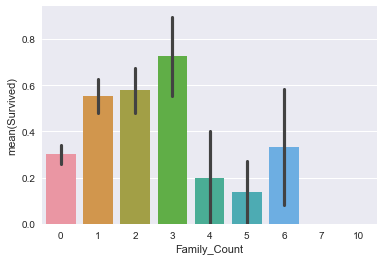

In [47]:
sns.barplot(titanic['Family_Count'], titanic['Survived'])

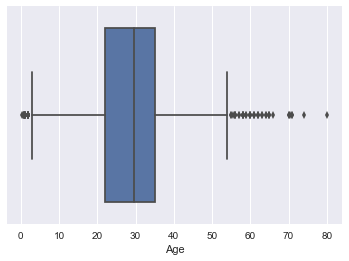

In [48]:
sns.boxplot(titanic['Age'])

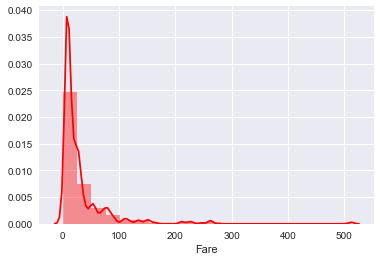

In [49]:
sns.distplot(titanic['Fare'], bins = 20, color = 'r')

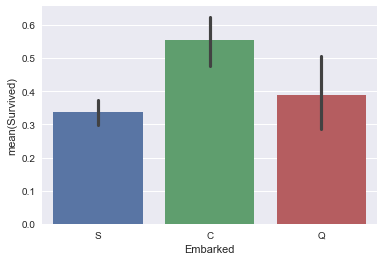

In [50]:
sns.barplot(titanic['Embarked'], titanic['Survived'])

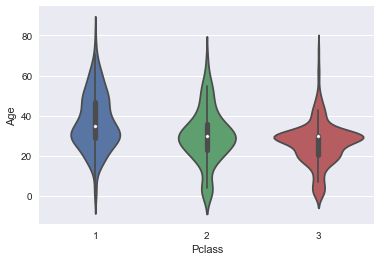

In [52]:
sns.violinplot(titanic['Pclass'],titanic['Age'])

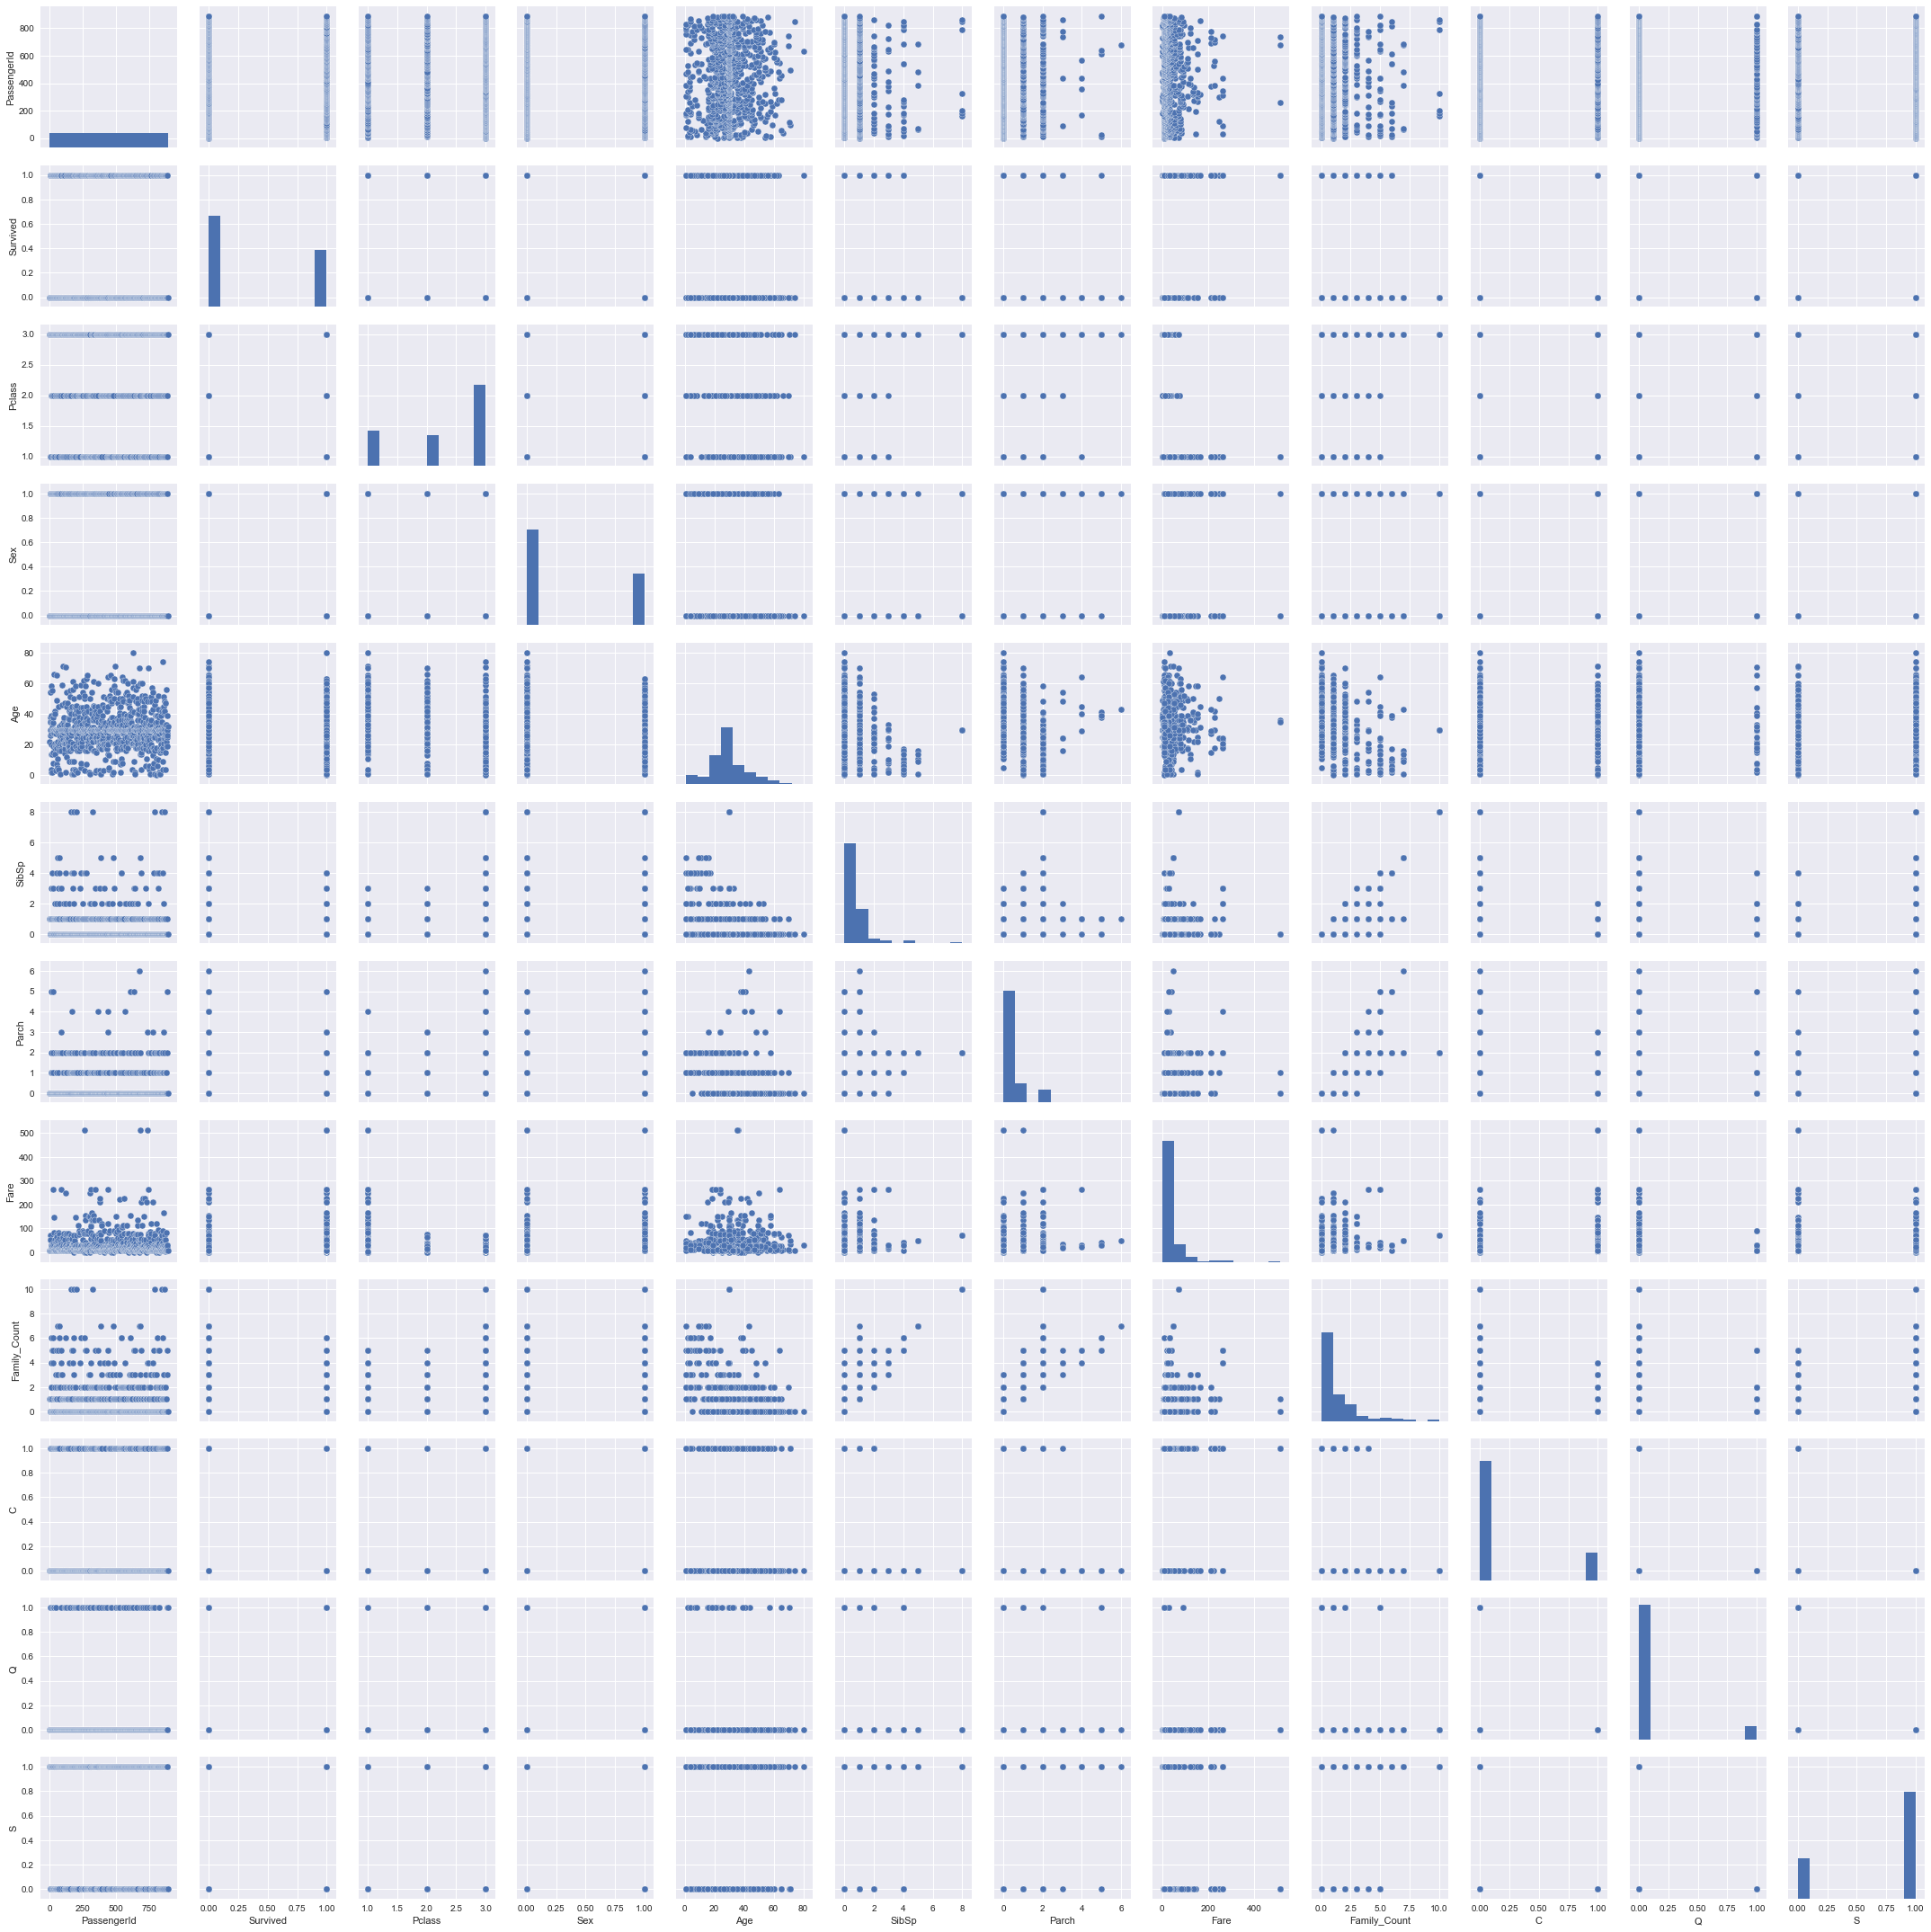

In [53]:
sns.pairplot(titanic)

## Please check out Series 2 to see how I use machine learning to predict if the passengers will survive! Cheers!